In [62]:
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import show, output_notebook
import plotly.offline as py
from sklearn.decomposition import PCA

In [63]:
py.init_notebook_mode()

In [64]:
output_notebook()

Loading BokehJS ...

In [65]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

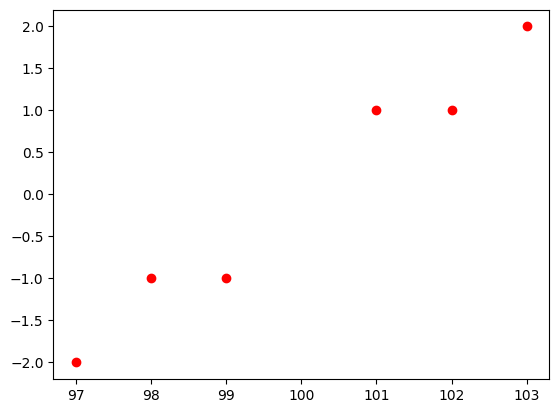

In [66]:
plt.plot(X[:,0],X[:,1],"ro")

In [67]:
# loading pca algorithm
pca_2=PCA(n_components=2)
pca_2

PCA(n_components=2)

In [68]:
# fit the data. We do not need to scale it, since sklearn's implementation already handles it.
pca_2.fit(X)

PCA(n_components=2)

In [69]:
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

The coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance").  The second principal component adds an additional 0.76% of the information ("explained variance") that is not stored in the first principal component coordinates.

In [70]:
x_trans_2=pca_2.transform(X)
x_trans_2

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

The coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance").  The second principal component adds an additional 0.76% of the information ("explained variance") that is not stored in the first principal component coordinates.

In [71]:
pca_1=PCA(n_components=1)
pca_1.fit(X)
print(pca_1.explained_variance_ratio_)

[0.99244289]


In [72]:
x_trans_1=pca_1.transform(X)
x_trans_1

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

Notice how this column is just the first column of `X_trans_2`.

If you had 2 features (two columns of data) and choose 2 principal components, then you'll keep all the information and the data will end up the same as the original.

In [73]:
x_reduced_2=pca_2.inverse_transform(x_trans_2)
x_reduced_2

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

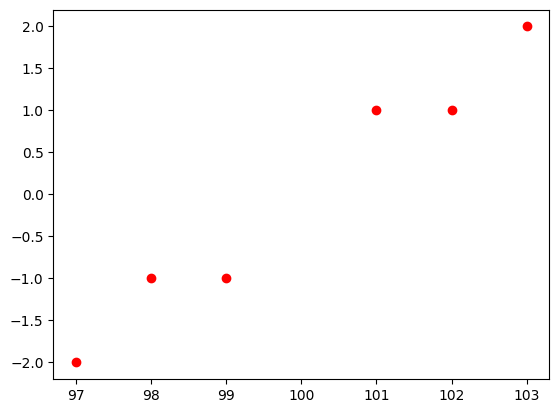

In [74]:
plt.plot(x_reduced_2[:,0], x_reduced_2[:,1], 'ro')

Reduce to 1 dimension instead of 2

In [75]:
x_reduced_1=pca_1.inverse_transform(x_trans_1)
x_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

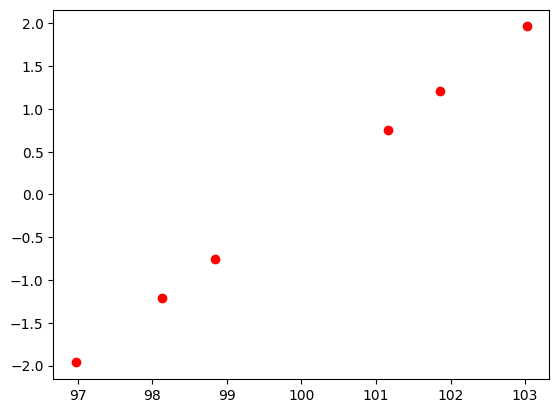

In [76]:
plt.plot(x_reduced_1[:,0], x_reduced_1[:,1], 'ro')

Notice how the data are now just on a single line (this line is the single principal component that was used to describe the data; and each example had a single "coordinate" along that axis to describe its location.

#### Visualizing the PCA algorithm

Let's define $10$ points in the plane and use them as an example to visualize how we can compress this points in 1 dimension. we will see that there are good ways and bad ways.

In [77]:
X = np.array([[-0.83934975, -0.21160323],
       [ 0.67508491,  0.25113527],
       [-0.05495253,  0.36339613],
       [-0.57524042,  0.24450324],
       [ 0.58468572,  0.95337657],
       [ 0.5663363 ,  0.07555096],
       [-0.50228538, -0.65749982],
       [-0.14075593,  0.02713815],
       [ 0.2587186 , -0.26890678],
       [ 0.02775847, -0.77709049]])

In [78]:
from bokeh.plotting import figure

In [79]:
p = figure(title = '10-point scatterplot', x_axis_label = 'x-axis', y_axis_label = 'y-axis') #Creates the figure object
p.scatter(X[:,0],X[:,1],marker = 'o', color = '#C00000', size = 5) #Add the scatter plot

# Some visual adjustments
p.grid.visible = False
p.grid.visible = False
p.outline_line_color = None 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.axis_line_color = "#f0f0f0"
p.xaxis.axis_line_width = 5
p.yaxis.axis_line_color = "#f0f0f0"
p.yaxis.axis_line_width = 5

show(p)

This is a dataset with $1000$ features.

Let's try to see if there is a pattern in the data. The following function will randomly sample 100 pairwise tuples (x,y) of features, so we can scatter-plot them.


In [80]:
import pandas as pd
df = pd.read_csv("toy_dataset.csv")
df

Number    City  Gender  Age    Income Illness
0            1  Dallas    Male   41   40367.0      No
1            2  Dallas    Male   54   45084.0      No
2            3  Dallas    Male   42   52483.0      No
3            4  Dallas    Male   40   40941.0      No
4            5  Dallas    Male   46   50289.0      No
...        ...     ...     ...  ...       ...     ...
149995  149996  Austin    Male   48   93669.0      No
149996  149997  Austin    Male   25   96748.0      No
149997  149998  Austin    Male   26  111885.0      No
149998  149999  Austin    Male   25  111878.0      No
149999  150000  Austin  Female   37   87251.0      No

[150000 rows x 6 columns]

In [81]:
def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    num_column=len(df.columns)
    while i < 100:
        x = df.columns[randint(0,num_column-1)]
        y = df.columns[randint(0,num_column-1)]
        while x == y and (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0,num_column-1)]
        tuples.append((x,y))
        i+=1
    return tuples
            

In [82]:
pairs=get_pairs()

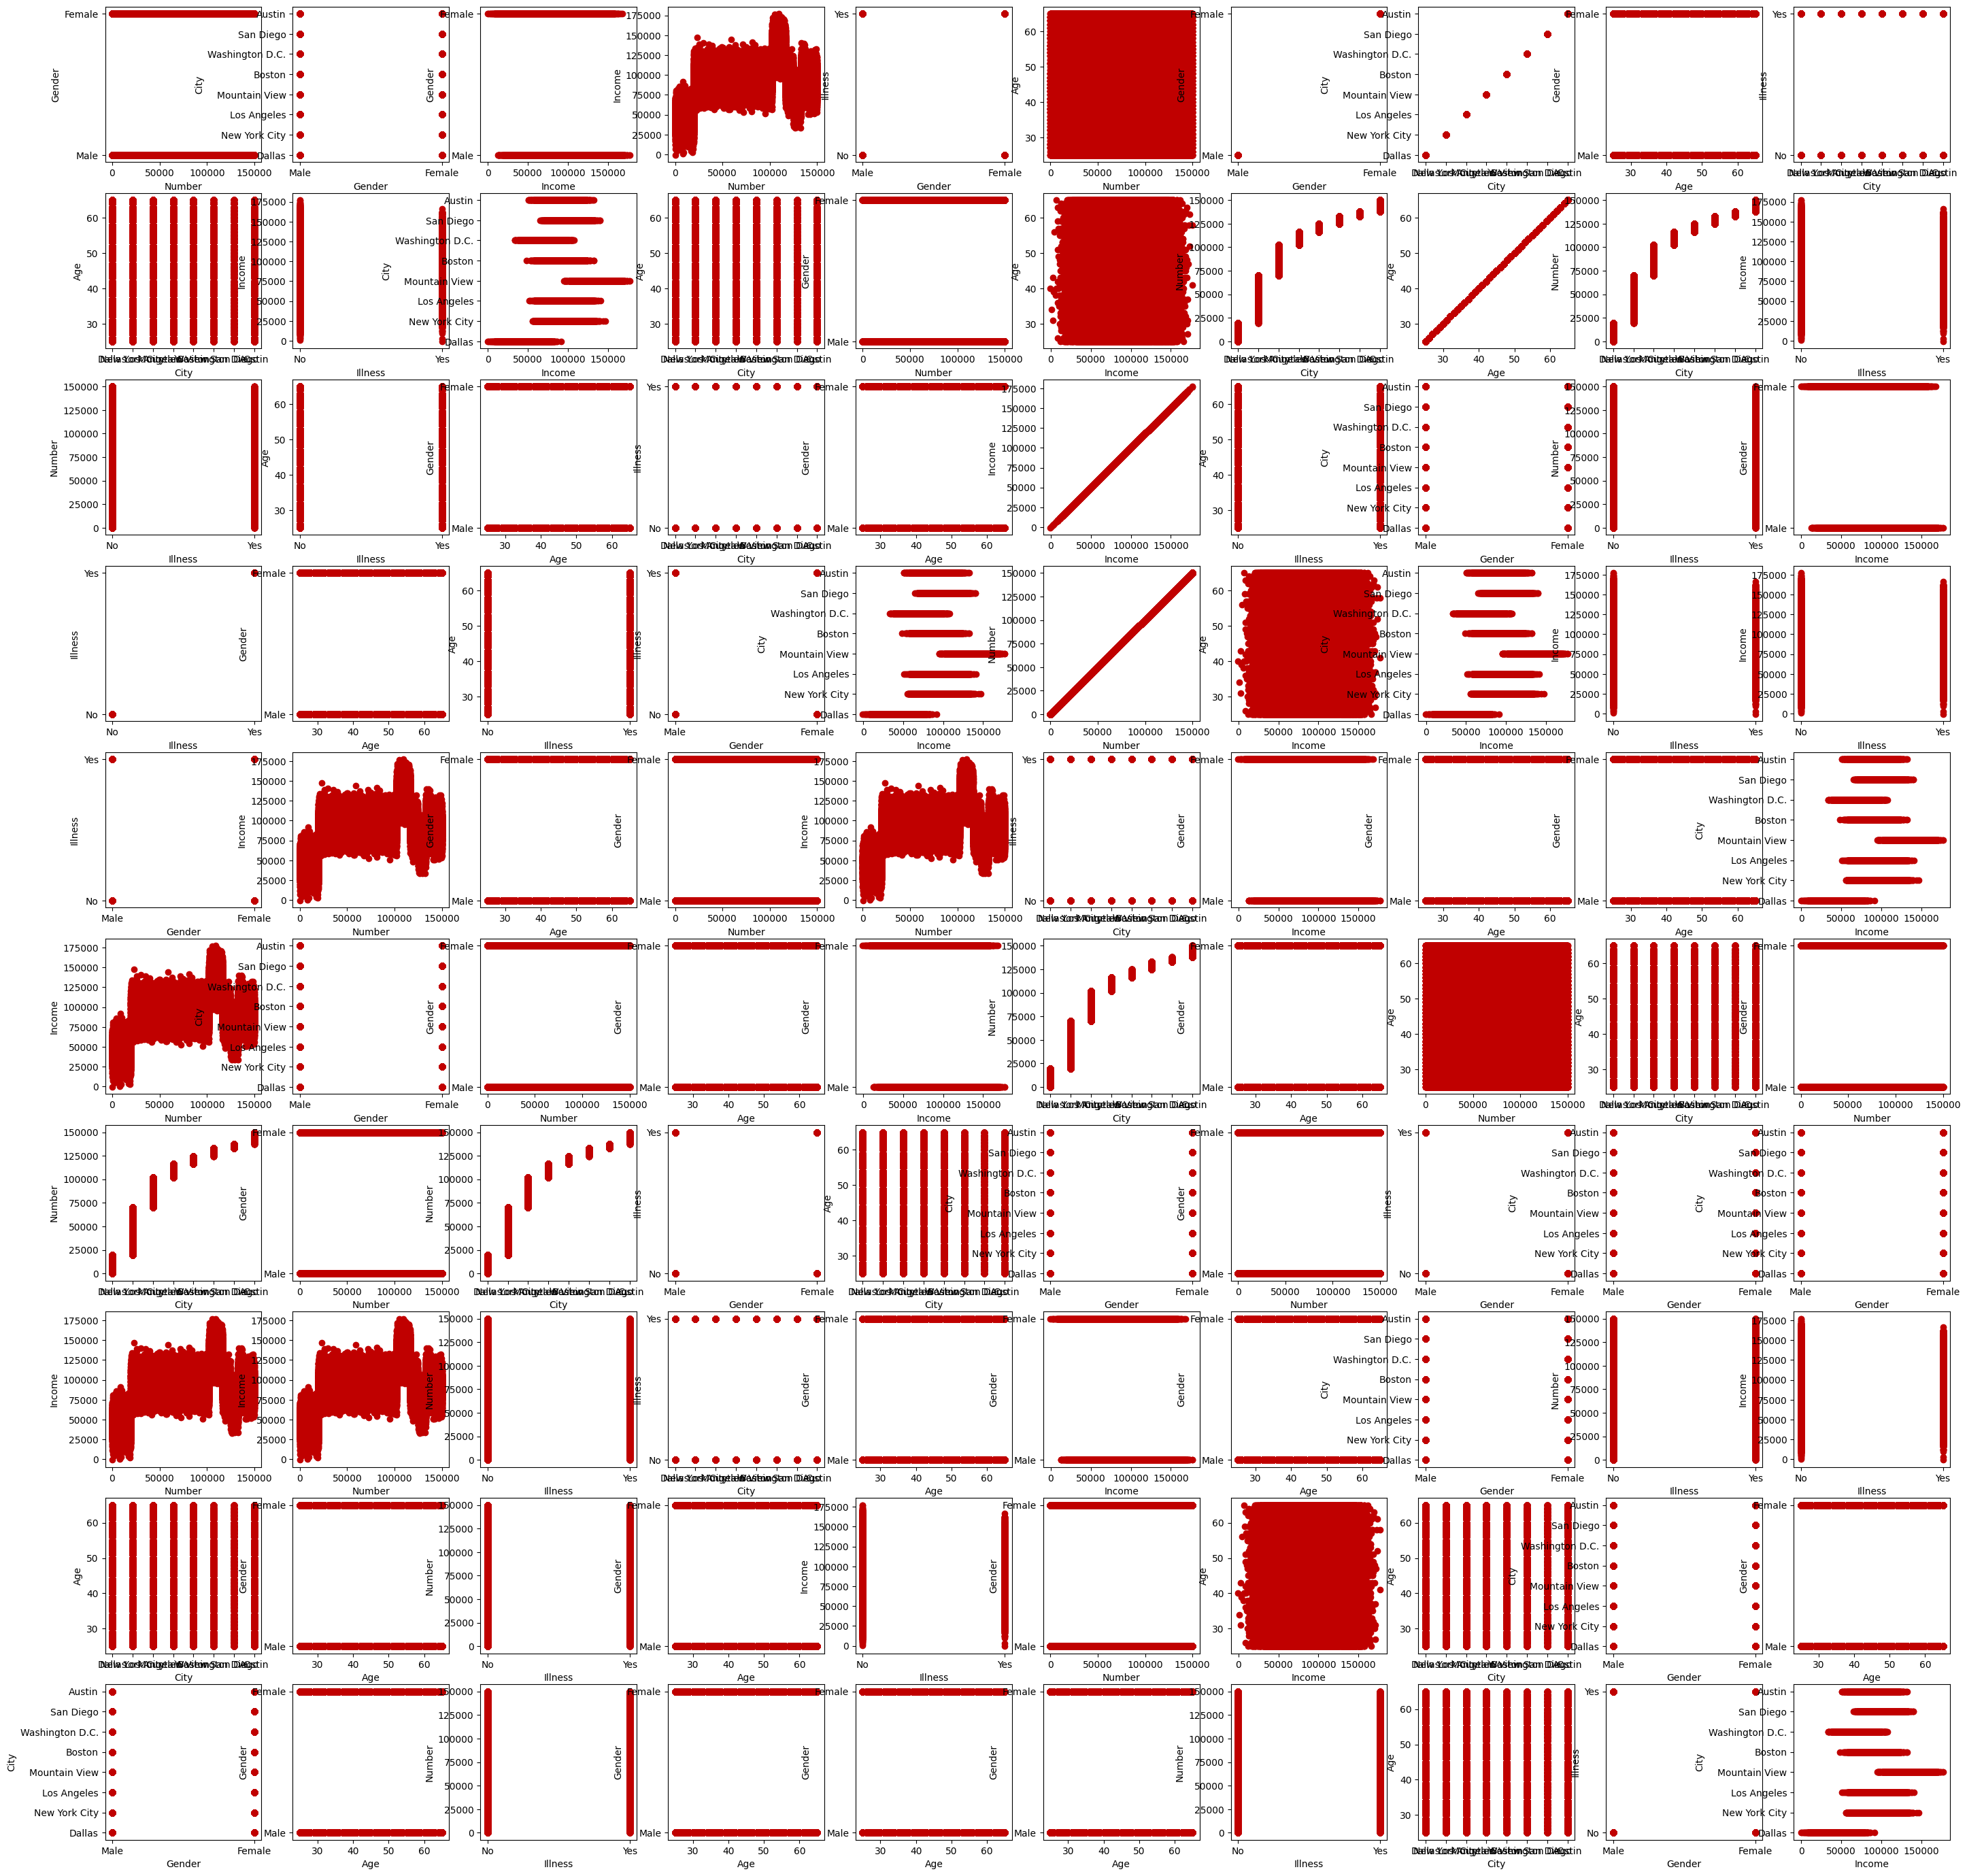

In [84]:
fig, axs = plt.subplots(10,10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]],df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1

It looks like there is not much information hidden in pairwise features. Also, it is not possible to check every combination, due to the amount of features. Let's try to see the linear correlation between them.

In [86]:
numeric_df = df.select_dtypes(include=[np.number]) # he DataFrame contains only numeric columns before calling df.corr()
corr = numeric_df.corr()
print(corr)

          Number       Age    Income
Number  1.000000 -0.003448  0.410460
Age    -0.003448  1.000000 -0.001318
Income  0.410460 -0.001318  1.000000


In [87]:
## This will show all the features that have correlation > 0.5 in absolute value. We remove the features 
## with correlation == 1 to remove the correlation of a feature with itself

mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

Series([], dtype: float64)

The maximum and minimum correlation is around $0.631$ - $0.632$. This does not show too much as well. 

Let's try PCA decomposition to compress our data into a 2-dimensional subspace (plane) so we can plot it as scatter plot. 

In [89]:
# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(numeric_df)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])
df_pca.head()

principal_component_1  principal_component_2
0           86917.316397           25684.033483
1           85482.726844           21190.477784
2           83232.997545           14141.795633
3           86740.002607           25138.098670
4           83897.914142           16232.615070

Text(0.5, 1.0, 'PCA decomposition')

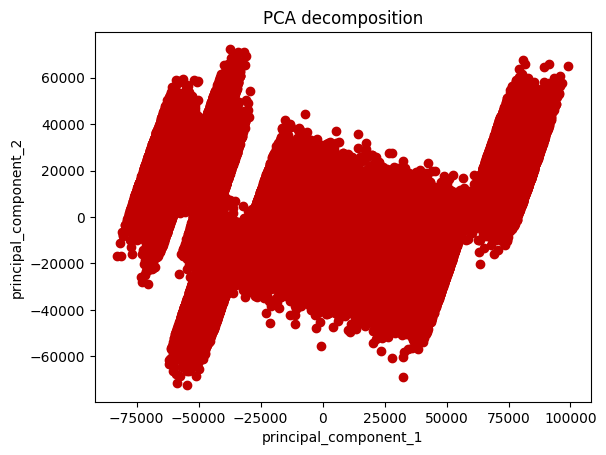

In [90]:
plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [91]:
# pca.explained_variance_ration_ returns a list where it shows the amount of variance explained by each principal component.
sum(pca.explained_variance_ratio_)

0.9999999464206886

In [93]:
pca_3 = PCA(n_components = 3).fit(numeric_df)
X_t = pca_3.transform(numeric_df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [94]:
import plotly.express as px

In [95]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()